In [1]:
## import pandas as pd
import datetime

In [2]:
df_links = pd.read_csv("Data/links.csv")
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [3]:
df_movies = pd.read_csv("Data/movies.csv")
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
df_tags = pd.read_csv("Data/tags.csv")
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [6]:
####
"""
All code can join on movieID

"""

'\nAll code can join on movieID\n\n'

In [7]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
movie_df = df_links.merge(df_movies, on='movieId').merge(df_ratings, on='movieId').merge(df_tags, on='movieId')


In [12]:
movie_df.head()

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825


In [13]:
sum(movie_df['title'] == 'Toy Story (1995)')

645

In [14]:
pd.set_option('display.max_rows', None)

In [16]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      233213 non-null  int64  
 1   imdbId       233213 non-null  int64  
 2   tmdbId       233213 non-null  float64
 3   title        233213 non-null  object 
 4   genres       233213 non-null  object 
 5   userId_x     233213 non-null  int64  
 6   rating       233213 non-null  float64
 7   timestamp_x  233213 non-null  int64  
 8   userId_y     233213 non-null  int64  
 9   tag          233213 non-null  object 
 10  timestamp_y  233213 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 21.4+ MB


FILTERING BY RATINGS OVER 3.5

In [29]:
filtered_df = movie_df[movie_df['rating'] >= 3.0]

sorted_df = filtered_df.sort_values('rating', ascending=False)
sorted_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 211573 entries, 66727 to 70309
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      211573 non-null  int64  
 1   imdbId       211573 non-null  int64  
 2   tmdbId       211573 non-null  float64
 3   title        211573 non-null  object 
 4   genres       211573 non-null  object 
 5   userId_x     211573 non-null  int64  
 6   rating       211573 non-null  float64
 7   timestamp_x  211573 non-null  int64  
 8   userId_y     211573 non-null  int64  
 9   tag          211573 non-null  object 
 10  timestamp_y  211573 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 19.4+ MB


CONVERTING TIMESTAMPS INTO DATES

In [30]:
sorted_df['date_x'] = sorted_df['timestamp_x'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
sorted_df.head()



,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,date_x
66727,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,434,5.0,1270603222,599,neo-noir,1498456486,2010-04-06 21:20:22
180082,4993,120737,120.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,137,5.0,1204859309,424,Magic,1457901158,2008-03-06 22:08:29
180074,4993,120737,120.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,135,5.0,1009692470,424,high fantasy,1457901162,2001-12-30 01:07:50
180075,4993,120737,120.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,135,5.0,1009692470,424,Magic,1457901158,2001-12-30 01:07:50
180076,4993,120737,120.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,135,5.0,1009692470,424,mythology,1457901174,2001-12-30 01:07:50


In [31]:
sorted_df['date_y'] = sorted_df['timestamp_y'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
sorted_df.head()



,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,date_x,date_y
66727,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,434,5.0,1270603222,599,neo-noir,1498456486,2010-04-06 21:20:22,2017-06-26 01:54:46
180082,4993,120737,120.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,137,5.0,1204859309,424,Magic,1457901158,2008-03-06 22:08:29,2016-03-13 16:32:38
180074,4993,120737,120.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,135,5.0,1009692470,424,high fantasy,1457901162,2001-12-30 01:07:50,2016-03-13 16:32:42
180075,4993,120737,120.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,135,5.0,1009692470,424,Magic,1457901158,2001-12-30 01:07:50,2016-03-13 16:32:38
180076,4993,120737,120.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,135,5.0,1009692470,424,mythology,1457901174,2001-12-30 01:07:50,2016-03-13 16:32:54


In [32]:
#######
###### Calculate timing between each timestamp and input amount of time in minutes. 

In [ ]:
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = surprise.Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(movie_df[['title', 'movieId', 'rating']], reader)

train, test = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
from surprise import KNNBasic

model = KNNBasic().fit(train)

In [ ]:
surprise.accuracy.mae(model.test(test))
surprise.accuracy.rmse(model.test(test))

In [ ]:
from surprise import SVD

model2 = SVD().fit(train)

In [ ]:
surprise.accuracy.mae(model2.test(test))
surprise.accuracy.rmse(model2.test(test))

In [ ]:
from surprise import NMF

model3 = NMF().fit(train)

In [ ]:
surprise.accuracy.mae(model3.test(test))
surprise.accuracy.rmse(model3.test(test))

# Database cleaning!

In [1]:
import pandas as pd
import datetime

In [2]:
df_movies = pd.read_csv("Data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df_ratings.drop(columns='timestamp', inplace=True)

In [5]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
df_cleaned = df_movies.merge(df_ratings, on='movieId')

In [7]:
df_cleaned.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [8]:
ratings_userid = df_cleaned[['userId','rating']]

In [9]:
ratings_userid.head()

,userId,rating
0,1,4.0
1,5,4.0
2,7,4.5
3,15,2.5
4,17,4.5


In [10]:
#pd.set_option('display.max_rows', None)

In [11]:
ratings_userid['userId'].value_counts().sort_values(ascending=False)

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
194      20
576      20
207      20
320      20
442      20
Name: userId, Length: 610, dtype: int64

In [12]:
userid_genre = df_cleaned[['userId','genres']]

In [13]:
userid_genre['genres'].value_counts().sort_values(ascending=False)

Comedy                                       7196
Drama                                        6291
Comedy|Romance                               3967
Comedy|Drama|Romance                         3000
Comedy|Drama                                 2851
                                             ... 
Action|Fantasy|Mystery                          1
Action|Documentary|Drama|Thriller               1
Action|Adventure|Comedy|Drama|Romance|War       1
Drama|Film-Noir|Mystery|Thriller                1
Action|Animation|Children|Comedy|Musical        1
Name: genres, Length: 951, dtype: int64

In [14]:
genres_split = df_cleaned.genres.apply(lambda x: x.split(sep='|')).apply(pd.value_counts, 1).fillna(0)
df_cleaned = pd.concat([df_cleaned.iloc[:,:], genres_split], axis=1)
df_cleaned.head()



,movieId,title,genres,userId,rating,Fantasy,Animation,Adventure,Comedy,Children,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_cleaned['(no genres listed)'].sum()

47.0

In [16]:
df_cleaned.drop(columns=['(no genres listed)'], inplace=True)

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      100836 non-null  int64  
 1   title        100836 non-null  object 
 2   genres       100836 non-null  object 
 3   userId       100836 non-null  int64  
 4   rating       100836 non-null  float64
 5   Fantasy      100836 non-null  float64
 6   Animation    100836 non-null  float64
 7   Adventure    100836 non-null  float64
 8   Comedy       100836 non-null  float64
 9   Children     100836 non-null  float64
 10  Romance      100836 non-null  float64
 11  Drama        100836 non-null  float64
 12  Action       100836 non-null  float64
 13  Thriller     100836 non-null  float64
 14  Crime        100836 non-null  float64
 15  Horror       100836 non-null  float64
 16  Mystery      100836 non-null  float64
 17  Sci-Fi       100836 non-null  float64
 18  War          100836 non-

In [18]:
df_cleaned['title'].head(10)

0    Toy Story (1995)
1    Toy Story (1995)
2    Toy Story (1995)
3    Toy Story (1995)
4    Toy Story (1995)
5    Toy Story (1995)
6    Toy Story (1995)
7    Toy Story (1995)
8    Toy Story (1995)
9    Toy Story (1995)
Name: title, dtype: object

In [19]:
### Create new column of 90s, 80s, 70s, 60s, 50, etc. Get out the year!!!!!
#df_cleaned['year'] = df_cleaned['title'].str[-5:-1]
#df_cleaned.head()

In [20]:
import re

def extract_year(title):
    match = re.search('\((\d{4})\)', title)
    if match:
        return match.group(1)
    else:
        return None

df_cleaned['year'] = df_cleaned['title'].apply(extract_year)

In [21]:
df_cleaned['year'].sort_values(ascending=True).head(10)

79586    1902
79588    1902
79589    1902
79590    1902
79587    1902
84027    1903
84026    1903
99298    1908
73484    1915
88111    1916
Name: year, dtype: object

In [22]:
df_cleaned['year'].isna().sum()

18

In [23]:
df_cleaned.dropna(subset=['year'], inplace=True)

In [24]:
df_cleaned['year'].isna().sum()

0

In [25]:
df_cleaned.head()

,movieId,title,genres,userId,rating,Fantasy,Animation,Adventure,Comedy,Children,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100835
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      100818 non-null  int64  
 1   title        100818 non-null  object 
 2   genres       100818 non-null  object 
 3   userId       100818 non-null  int64  
 4   rating       100818 non-null  float64
 5   Fantasy      100818 non-null  float64
 6   Animation    100818 non-null  float64
 7   Adventure    100818 non-null  float64
 8   Comedy       100818 non-null  float64
 9   Children     100818 non-null  float64
 10  Romance      100818 non-null  float64
 11  Drama        100818 non-null  float64
 12  Action       100818 non-null  float64
 13  Thriller     100818 non-null  float64
 14  Crime        100818 non-null  float64
 15  Horror       100818 non-null  float64
 16  Mystery      100818 non-null  float64
 17  Sci-Fi       100818 non-null  float64
 18  War          100818 non-

In [27]:
df_cleaned['year'] = df_cleaned['year'].astype('int')

In [28]:
#pd.set_option('display.max_rows', None)

In [29]:
#pd.reset_option('display.max_rows')

In [30]:
df_cleaned['year'].value_counts().head(10)

1995    6144
1994    5296
1999    4536
1996    4509
2000    4268
2001    3914
1993    3741
1997    3643
2002    3642
1998    3557
Name: year, dtype: int64

In [31]:
#Create new columns for each decade of movie

df_cleaned['1900s'] = ((df_cleaned['year'] >= 1900) & (df_cleaned['year'] < 1910)).astype(float)
df_cleaned['1910s'] = ((df_cleaned['year'] >= 1910) & (df_cleaned['year'] < 1920)).astype(float)
df_cleaned['1920s'] = ((df_cleaned['year'] >= 1920) & (df_cleaned['year'] < 1930)).astype(float)
df_cleaned['1930s'] = ((df_cleaned['year'] >= 1930) & (df_cleaned['year'] < 1940)).astype(float)
df_cleaned['1940s'] = ((df_cleaned['year'] >= 1940) & (df_cleaned['year'] < 1950)).astype(float)
df_cleaned['1950s'] = ((df_cleaned['year'] >= 1950) & (df_cleaned['year'] < 1960)).astype(float)
df_cleaned['1960s'] = ((df_cleaned['year'] >= 1960) & (df_cleaned['year'] < 1970)).astype(float)
df_cleaned['1970s'] = ((df_cleaned['year'] >= 1970) & (df_cleaned['year'] < 1980)).astype(float)
df_cleaned['1980s'] = ((df_cleaned['year'] >= 1980) & (df_cleaned['year'] < 1990)).astype(float)
df_cleaned['1990s'] = ((df_cleaned['year'] >= 1990) & (df_cleaned['year'] < 2000)).astype(float)
df_cleaned['2000s'] = ((df_cleaned['year'] >= 2000) & (df_cleaned['year'] < 2010)).astype(float)
df_cleaned['2010s'] = ((df_cleaned['year'] >= 2010) & (df_cleaned['year'] < 2020)).astype(float)

In [32]:
df_cleaned.head()

,movieId,title,genres,userId,rating,Fantasy,Animation,Adventure,Comedy,Children,...,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100835
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      100818 non-null  int64  
 1   title        100818 non-null  object 
 2   genres       100818 non-null  object 
 3   userId       100818 non-null  int64  
 4   rating       100818 non-null  float64
 5   Fantasy      100818 non-null  float64
 6   Animation    100818 non-null  float64
 7   Adventure    100818 non-null  float64
 8   Comedy       100818 non-null  float64
 9   Children     100818 non-null  float64
 10  Romance      100818 non-null  float64
 11  Drama        100818 non-null  float64
 12  Action       100818 non-null  float64
 13  Thriller     100818 non-null  float64
 14  Crime        100818 non-null  float64
 15  Horror       100818 non-null  float64
 16  Mystery      100818 non-null  float64
 17  Sci-Fi       100818 non-null  float64
 18  War          100818 non-

In [34]:
df_clean = df_cleaned[df_cleaned['rating'] >= 3.0]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81748 entries, 0 to 100835
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      81748 non-null  int64  
 1   title        81748 non-null  object 
 2   genres       81748 non-null  object 
 3   userId       81748 non-null  int64  
 4   rating       81748 non-null  float64
 5   Fantasy      81748 non-null  float64
 6   Animation    81748 non-null  float64
 7   Adventure    81748 non-null  float64
 8   Comedy       81748 non-null  float64
 9   Children     81748 non-null  float64
 10  Romance      81748 non-null  float64
 11  Drama        81748 non-null  float64
 12  Action       81748 non-null  float64
 13  Thriller     81748 non-null  float64
 14  Crime        81748 non-null  float64
 15  Horror       81748 non-null  float64
 16  Mystery      81748 non-null  float64
 17  Sci-Fi       81748 non-null  float64
 18  War          81748 non-null  float64
 19  Mus

In [35]:
df_clean['userId'].nunique()


609

In [36]:
top_users = df_clean['userId'].value_counts(normalize=True)[:100] * 100
top_users

414    2.588443
474    2.140725
610    1.417772
599    1.349268
380    1.335812
         ...   
562    0.277683
1      0.276459
212    0.276459
186    0.275236
432    0.271566
Name: userId, Length: 100, dtype: float64

# Plotting Graphs

In [60]:
# Set font size for all plots
plt.rcParams.update({'font.size': 14})

In [61]:
# Assume we want to find the genres mostly watched by user with id 123
user_id = 414

# Select the rows in the dataframe corresponding to the user
user_df = df_clean[df_clean['userId'] == user_id]

# Calculate the sum of each genre watched by the user
genre_sum = user_df.iloc[:,5:24].sum()

# Sort the genres by the sum of ratings in descending order
sorted_genres1 = genre_sum.sort_values(ascending=False)

# Print the sorted genres
print(sorted_genres1)

Drama          1120.0
Comedy          780.0
Action          501.0
Thriller        472.0
Romance         395.0
Adventure       361.0
Crime           344.0
Sci-Fi          256.0
Fantasy         173.0
Children        139.0
Mystery         129.0
War             112.0
Animation       110.0
Horror           92.0
Musical          89.0
Documentary      58.0
IMAX             51.0
Western          43.0
Film-Noir        13.0
dtype: float64


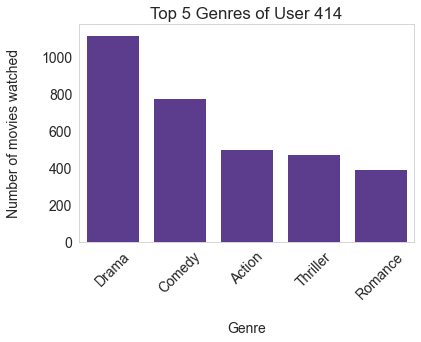

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 genres
top_genres = sorted_genres1.head(5)

# Create a bar plot using seaborn
sns.barplot(x=top_genres.index, y=top_genres.values)
color = '#582f9a'
sns.set_style("whitegrid")  # set the style to whitegrid
ax = sns.barplot(x=top_genres.index, y=top_genres.values, color=color)
plt.title('Top 5 Genres of User 414')
plt.xlabel('Genre',labelpad=20)
plt.xticks(rotation=45)
plt.ylabel('Number of movies watched',labelpad=20)
plt.grid(False)
plt.savefig('Models/top5_user414.png', bbox_inches='tight', dpi=300,transparent=True)
plt.savefig('Illustrations/top5_user414.png', bbox_inches='tight', dpi=300)

plt.show()



In [63]:
# Assume we want to find the genres mostly watched by user with id 123
user_id = 474

# Select the rows in the dataframe corresponding to the user
user_df = df_clean[df_clean['userId'] == user_id]

# Calculate the sum of each genre watched by the user
genre_sum = user_df.iloc[:,5:24].sum()

# Sort the genres by the sum of ratings in descending order
sorted_genres2 = genre_sum.sort_values(ascending=False)

# Print the sorted genres
print(sorted_genres2)

Drama          1047.0
Comedy          569.0
Romance         430.0
Thriller        302.0
Adventure       218.0
Crime           212.0
Action          172.0
Mystery         126.0
Sci-Fi          122.0
Fantasy         113.0
Musical         112.0
Children        105.0
War             101.0
Documentary      90.0
Horror           73.0
Animation        70.0
Film-Noir        46.0
Western          41.0
IMAX             15.0
dtype: float64


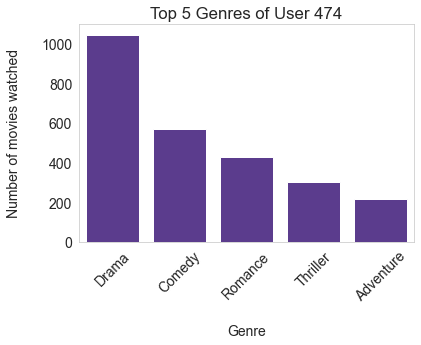

In [64]:
# Import matplotlib.pyplot for plotting
import seaborn as sns

# Get the top 5 genres
top_genres = sorted_genres2.head(5)

# Create a bar plot using seaborn
sns.barplot(x=top_genres.index, y=top_genres.values)
color = '#582f9a'
sns.set_style("whitegrid")  # set the style to whitegrid
ax = sns.barplot(x=top_genres.index, y=top_genres.values, color=color)
plt.title('Top 5 Genres of User 474')
plt.xlabel('Genre',labelpad=20)
plt.xticks(rotation=45)
plt.ylabel('Number of movies watched',labelpad=20)
plt.grid(False)
plt.savefig('Models/top5_user474.png', bbox_inches='tight', dpi=300,transparent=True)
plt.savefig('Illustrations/top5_user474.png', bbox_inches='tight', dpi=300)

plt.show()



In [67]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=2)
sns.set_style(style='white')

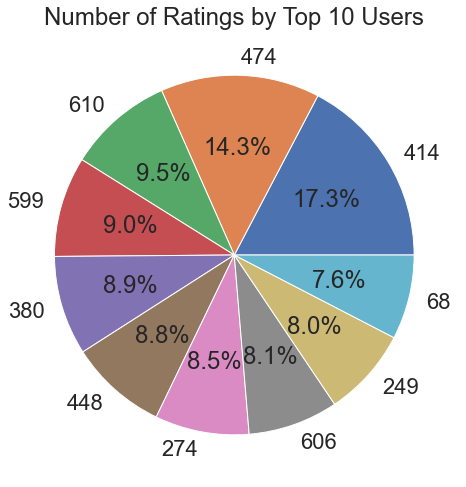

In [68]:
import matplotlib.pyplot as plt

# group the data by userId and count the number of ratings for each user
user_ratings_counts = df_clean.groupby('userId')['rating'].count()

# get the top 100 users by rating count
top_10_users = user_ratings_counts.sort_values(ascending=False)[:10]

# create a pie chart of the user rating counts for the top 100 users
plt.pie(top_10_users.values, labels=top_10_users.index, autopct='%1.1f%%')
plt.title('Number of Ratings by Top 10 Users') 
plt.show()

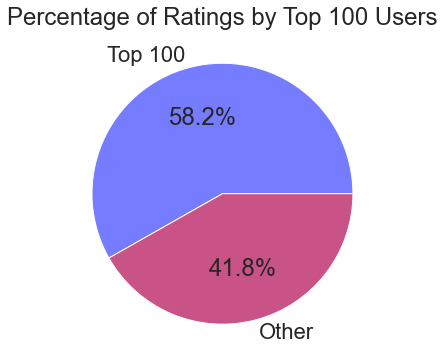

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by userId and count the number of ratings for each user
user_ratings_counts = df_clean.groupby('userId')['rating'].count()

# get the top 100 users by rating count
top_100_users = user_ratings_counts.sort_values(ascending=False)[:100]

# get the count of ratings for all users in the top 100
top_100_ratings = top_100_users.sum()

# get the count of ratings for all users not in the top 100
other_ratings = user_ratings_counts.sum() - top_100_ratings

# combine the top 10 users and other into a new dataframe
user_counts = pd.concat([pd.Series({'Top 100': top_100_ratings}), pd.Series({'Other': other_ratings})])

# set the color palette using Seaborn
sns.set_palette(['#757cff', '#c95286'])

# create a pie chart of the user rating counts for the top 10 users and other
plt.figure(figsize=(6, 6))
plt.pie(user_counts.values, labels=user_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Ratings by Top 100 Users')
plt.savefig('Models/piechart_top100.png', bbox_inches='tight', dpi=300)
plt.savefig('Illustrations/piechart_top100.png', bbox_inches='tight', dpi=300)

plt.show()



In [44]:
df_clean['num_viewers'] = df_clean.groupby('movieId')['userId'].transform('count')


<ipython-input-44-d8f9b6ba9268>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['num_viewers'] = df_clean.groupby('movieId')['userId'].transform('count')


In [45]:
df_clean.head()

,movieId,title,genres,userId,rating,Fantasy,Animation,Adventure,Comedy,Children,...,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,num_viewers
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199


In [70]:
plt.rcParams.update({'font.size': 14})

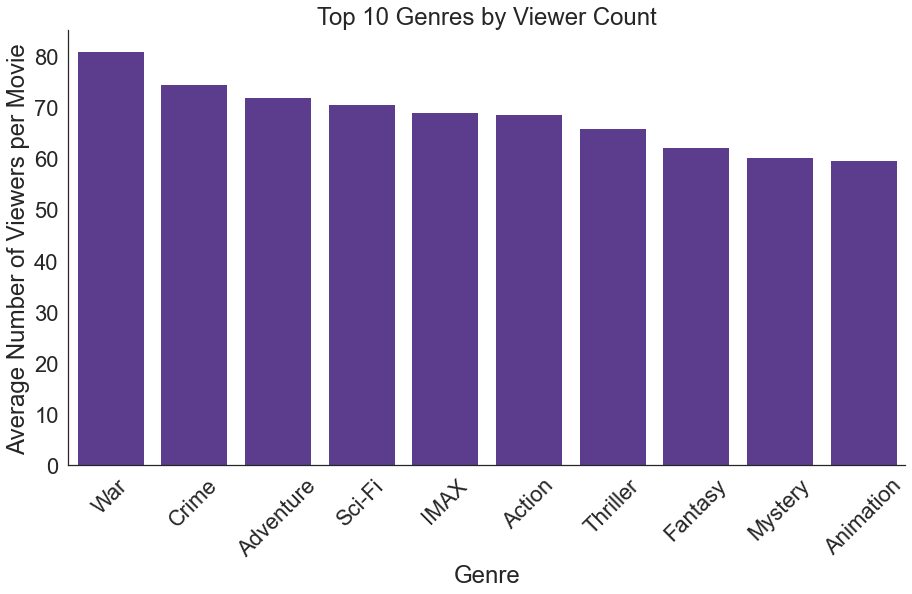

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

genres_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Set the seaborn style and color palette
sns.set_style("white")
sns.set_palette(["#582f9a"])

# Multiply each column by the number of viewers, and sum the results for each genre
genre_views = df_clean[genres_cols].multiply(df_clean['num_viewers'], axis=0).sum()

# Count the number of movies for each genre
genre_counts = df_clean[genres_cols].apply(lambda x: (x == 1.0).sum())

# Divide the sum of viewers by the number of movies to get the average number of viewers per movie for each genre
genre_avg_views = genre_views / genre_counts

# Sort the genres by their average number of viewers per movie, and select the top 10
top_genres = genre_avg_views.sort_values(ascending=False).head(10)

# Create a bar plot using seaborn for the top 10 genres
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_genres.index, y=top_genres.values, color='#582f9a')
ax.set(xlabel='Genre', ylabel='Average Number of Viewers per Movie', title='Top 10 Genres by Viewer Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.despine()
plt.savefig('Models/AvgNumViews_Genre.png', bbox_inches='tight', dpi=300)
plt.savefig('Illustrations/AvgNumViews_Genre.png', bbox_inches='tight', dpi=300)

plt.show()


# Testing out Modeling

In [27]:
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [52]:
reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(df_cleaned[['userId', 'movieId', 'rating']], reader)


In [53]:
train, test = train_test_split(data, test_size=0.2, random_state=42)


In [40]:
from surprise import KNNBasic

model = KNNBasic().fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [41]:
surprise.accuracy.mae(model.test(test))
surprise.accuracy.rmse(model.test(test))

MAE:  0.5251
RMSE: 0.6432


0.6432395736952233

In [54]:
from surprise import SVD

model2 = SVD().fit(train)

In [55]:
surprise.accuracy.mae(model2.test(test))
surprise.accuracy.rmse(model2.test(test))

MAE:  0.4870
RMSE: 0.5979


0.5978986373941764

In [44]:
from surprise import NMF

model3 = NMF().fit(train)

In [45]:
surprise.accuracy.mae(model3.test(test))
surprise.accuracy.rmse(model3.test(test))

MAE:  0.5164
RMSE: 0.6441


0.6441014725423281

In [48]:
cross_validate(model2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5969  0.6002  0.5948  0.5960  0.5990  0.5974  0.0020  
MAE (testset)     0.4875  0.4898  0.4855  0.4847  0.4870  0.4869  0.0018  
Fit time          3.62    3.58    3.66    3.70    3.66    3.65    0.04    
Test time         0.07    0.07    0.06    0.06    0.06    0.06    0.00    


{'test_rmse': array([0.59693603, 0.60023608, 0.59479896, 0.59600851, 0.59902782]),
 'test_mae': array([0.487544  , 0.48977568, 0.485502  , 0.48468382, 0.48700539]),
 'fit_time': (3.6191999912261963,
  3.5813281536102295,
  3.6616969108581543,
  3.7036900520324707,
  3.661216974258423),
 'test_time': (0.06599020957946777,
  0.06673622131347656,
  0.05965089797973633,
  0.06446504592895508,
  0.06116604804992676)}

In [34]:
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise.prediction_algorithms.matrix_factorization import SVD

In [41]:
#reader = Reader(rating_scale=(1.0, 5.0))
#data = Dataset.load_from_df(df_cleaned[['userId', 'movieId', 'rating']], reader)
#
#trainset, testset = train_test_split(data, test_size=0.4)
#

In [36]:
#param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#              'reg_all': [0.4, 0.6]}

In [31]:
#algo = surprise.SVD()
#algo.fit(trainset)

In [3]:
#print(type(algo))


In [2]:
#predictions
#predictions = algo.test(testset)


In [4]:
#accuracy.rmse(predictions)
#accuracy.mae(predictions)
#accuracy.fcp(predictions)

In [37]:
# Create the grid search object
#gs = GridSearchCV(algo, param_grid, measures=['rmse', 'mae'])

In [1]:
## Define the evaluation metrics to use for the grid search
#eval_metrics = ['rmse', 'mae']
#
## Perform grid search using cross-validation
#gs = GridSearchCV(algo, param_grid, measures=eval_metrics, cv=5)
#gs.fit(data)
#
## Print the best RMSE score and corresponding parameters
#print(gs.best_score['rmse'])
#print(gs.best_params['rmse'])
#
## Print the best MAE score and corresponding parameters
#print(gs.best_score['mae'])
#print(gs.best_params['mae'])

In [39]:
SVD = SVD()

In [42]:
from surprise.model_selection import RandomizedSearchCV
from surprise import SVD

# Define the search space for hyperparameters
param_distributions = {'n_factors': [50, 100, 200],
                       'n_epochs': [10, 20, 30],
                       'lr_all': [0.002, 0.005, 0.01],
                       'reg_all': [0.02, 0.1, 0.4]}

# Create the randomized search object
rs = RandomizedSearchCV(SVD, param_distributions, n_iter=10, measures=['rmse', 'mae'], cv=5)

# Run the randomized search
rs.fit(data)

# Get the best RMSE score and the corresponding hyperparameters
best_rmse = rs.best_score['rmse']
best_params = rs.best_params['rmse']


In [44]:
print('Best RMSE: ' + str(best_rmse))

Best RMSE: 0.8540485033461396


In [45]:
print('Best Params: ' + str(best_params))

Best Params: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
